[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  2  4  6  8 10 12 14 16 18 20]
100 epochs elapsed
Current accuracy is : 0.9836456109008862


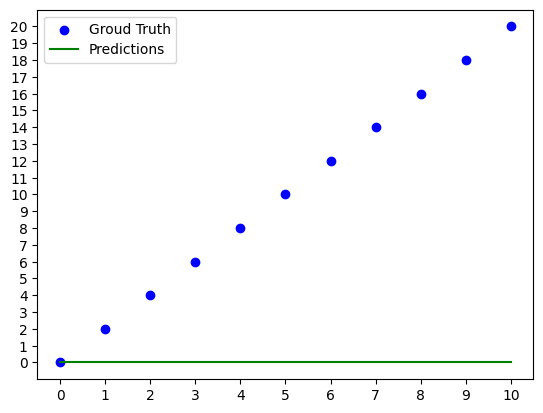

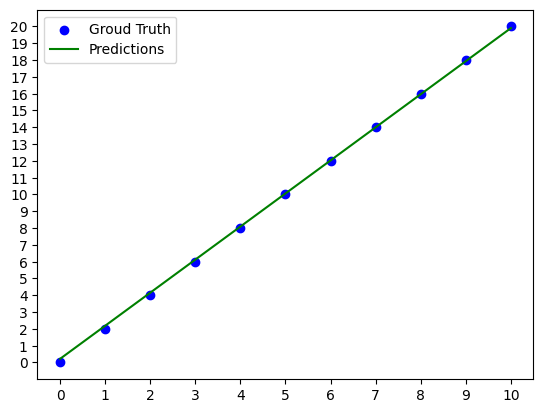

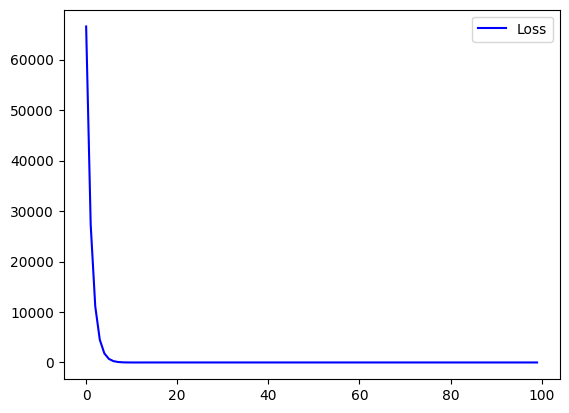

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# X features --> House features
# Y target.  --> House price

# y_hat = (x * a1) + a0
# MSE = 1/m * sum (y - y_hat) ^ 2 = 1/m *sum (y - x*a1 - a0) ^2

class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.a = [0, 0] # [a1, a2]

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        # MSE = 1/m sum (Y_pred - Y)2 = 1/m sum (a1 X_i + a0 - Y_i)^2
        # dMSE/da0 = 1/m sum (a1 X_i + a0 - Y_i)
        # dMSE/da1 = 1/m sum (a1 X_i + a0 - Y_i) * X_i
        gradient_0 = 0.0
        gradient_1 = 0.0
        for i in range(len(Y)):
          gradient_0 += Y_pred[i] - Y[i]
          gradient_1 += (Y_pred[i] - Y[i]) * self.X[i]
        # self.a[0] = self.a[0] - (learning_rate * 2) * 1/m * error_0 # lr = 0.5
        self.a[0] = self.a[0] - (learning_rate) * 1/m * gradient_0

        self.a[1] = self.a[1] - (learning_rate) * 1/m * gradient_1

        # self.a[0] = self.a[0] - (learning_rate * ((1/m) *
        #                                           np.sum(Y_pred - Y)))

        # self.a[1] = self.a[1] - (learning_rate * ((1/m) *
        #                                           np.sum((Y_pred - Y) * self.X)))

    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X:
            X = self.X
        a = self.a
        for x in X:
            Y_pred = np.append(Y_pred, a[0] + (a[1] * x))

        return Y_pred

    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        err = 0.0
        for i in range(n):
          if e[i] != 0:
            err += abs(p[i] - e[i]) / e[i]
        acc = (1 - err/n)
        acc2 = 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n
        if abs(acc - acc2) > 0.0001:
          print('Different accuracy!!', acc, acc2)
        return 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J

    def plot_best_fit(self, Y_pred, caption):
        f = plt.figure(caption)
        plt.scatter(self.X, self.Y, color='b', label = 'Groud Truth')
        plt.plot(self.X, Y_pred, color='g', label = 'Predictions')
        plt.xticks(np.arange(min(self.X), max(self.X)+1, 1.0))
        plt.yticks(np.arange(min(self.Y), max(self.Y)+1, 1.0))
        plt.legend(loc="upper left")
        f.show()


def main():
    X = np.array([i for i in range(11)])
    # Y = 2X
    # Y = a_1 X + a_0 ... a_1 = 2, a_0 = 0
    #[ 0  1  2  3  4  5  6  7  8  9 10]
    #[ 0  2  4  6  8 10 12 14 16 18 20]
    Y = np.array([2*i for i in range(11)])
    print(X)
    print(Y)

    regressor = Linear_Regression(X, Y)

    steps = 100
    learning_rate = 0.01
    costs = []

    # original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

    for iter in range(steps):
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)

        iter += 1
        if iter % steps == 0:
            print(iter, "epochs elapsed")
            print("Current accuracy is :",
                  regressor.get_current_accuracy(Y_pred))

    # final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

    # plot to verify cost function decreases
    h = plt.figure('Verification')
    plt.plot(range(iter), costs, color='b', label='Loss')
    plt.legend(loc="upper right")
    h.show()

    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])


if __name__ == '__main__':
    main()